In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import cluster
from scipy import signal

# Problem 1: K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

## 1-1. cluster with only RGB values

In [2]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Method 1: opencv

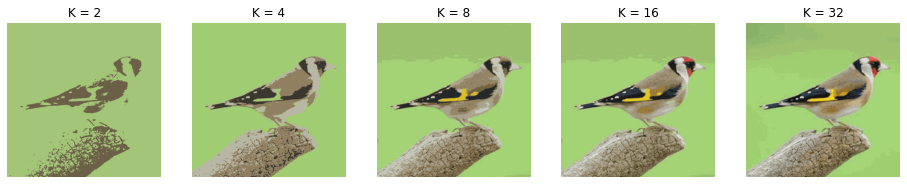

In [3]:
Z = img.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 300, 1.0)
Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

### Method 2: sklearn

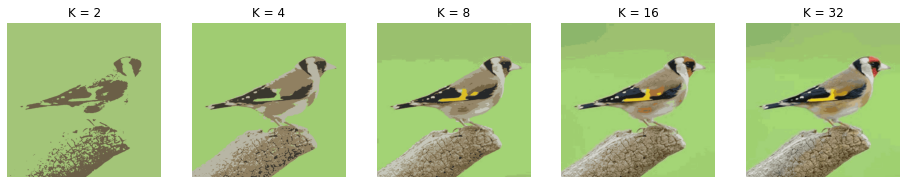

In [4]:
def km_clust(array, n_clusters):
    
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    values = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, values)

h, w, c = img.shape

Z = img
Z = Z.reshape(-1, 3)

Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

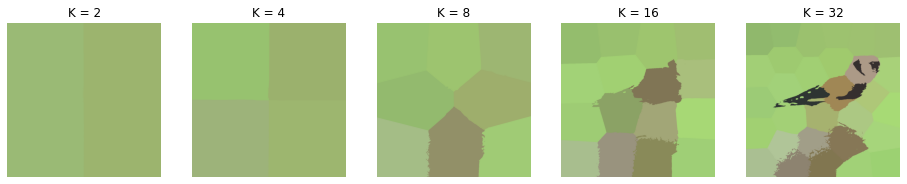

In [5]:
def km_clust(array, n_clusters):
    
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    values = k_m.cluster_centers_
    # Get the label of each point
    label = k_m.labels_
    return(label, values)

h, w, c = img.shape

Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2, 4, 8, 16, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

# Problem 2: Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

# Problem 3: Image Filtering 
**Image filtering** is a basic method to smoothen or sharpen an image. The general operation of image filtering is to compute the function of local neighborhood and output the new value for each pixel of interest. 

## 3-1. 2D Gaussian filter

In [6]:
img = cv2.imread('data/lena.png', cv2.IMREAD_GRAYSCALE)

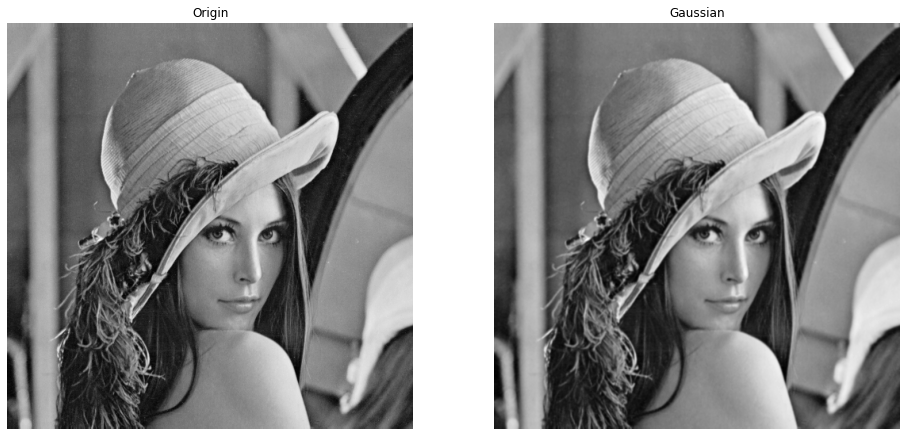

In [7]:
plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Origin")
plt.imshow(img, cmap='gray')

#3*3 Gassian filter
sigma = 1/(2*np.log(2))
x, y = np.mgrid[-1:2, -1:2]
gaussian_kernel = np.exp(-(x**2+y**2)/(2*sigma*sigma)) / (2*np.pi*sigma*sigma)

#Normalization
gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

img_gaussian = signal.convolve2d(img, gaussian_kernel, boundary='symm', mode='same')


plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Gaussian")
plt.imshow(img_gaussian, cmap='gray')
plt.show()

## 3-2. Detecting edges
\\( k_x=\begin{bmatrix}
          -0.5 & 0 & 0.5
        \end{bmatrix}
\\)

\\( k_y=\begin{bmatrix}
          -0.5 \\ 0 \\ 0.5
        \end{bmatrix}
\\)

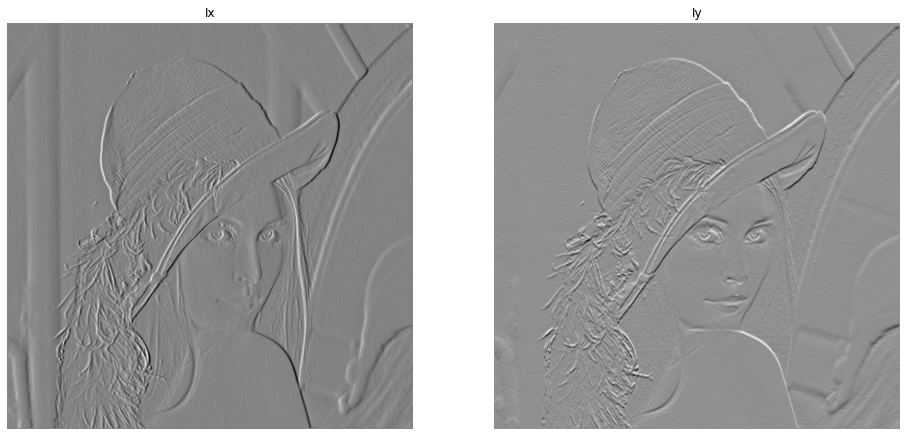

In [8]:
Ix = np.zeros(img.shape)
Iy = np.zeros(img.shape)
for h in range(1, len(Ix)-1):
    for w in range(1, len(Ix[h])-1):
        Ix[h][w] = -0.5*img[h][w-1] + 0.5*img[h][w+1]
        Iy[h][w] = -0.5*img[h-1][w] + 0.5*img[h+1][w]

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Ix")
plt.imshow(Ix, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Iy")
plt.imshow(Iy, cmap='gray')

plt.show()

## 3-3. Gradient magnitude

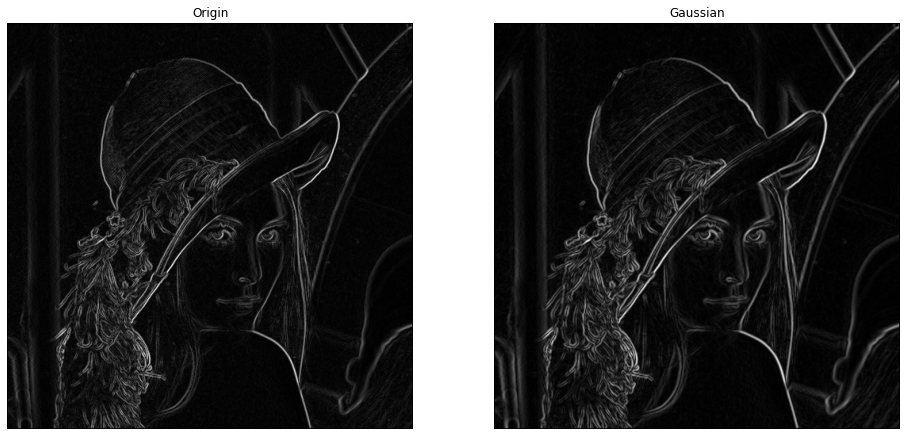

In [9]:
Ix = np.zeros(img.shape)
Iy = np.zeros(img.shape)
for h in range(1, len(Ix)-1):
    for w in range(1, len(Ix[h])-1):
        Ix[h][w] = -0.5*img[h][w-1] + 0.5*img[h][w+1]
        Iy[h][w] = -0.5*img[h-1][w] + 0.5*img[h+1][w]
Im_origin = (Ix**2+Iy**2)**0.5

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Origin")
plt.imshow(Im_origin, cmap='gray')

Ix = np.zeros(img_gaussian.shape)
Iy = np.zeros(img_gaussian.shape)
for h in range(1, len(Ix)-1):
    for w in range(1, len(Ix[h])-1):
        Ix[h][w] = -0.5*img_gaussian[h][w-1] + 0.5*img_gaussian[h][w+1]
        Iy[h][w] = -0.5*img_gaussian[h-1][w] + 0.5*img_gaussian[h+1][w]
Im_gaussian = (Ix**2+Iy**2)**0.5

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Gaussian")
plt.imshow(Im_gaussian, cmap='gray')

plt.show()